In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQBN8DPW2rdiRrY34eEM53HAzakNGSRrw4ogI-j8HyCUrbqTB_z4CeIn2IvjLF-w_6sOe5pIlypJGAA/pub?output=csv'
df = pd.read_csv(url, index_col=0)
df.head()

,sex,bmi,children,smoker,region,charges
age,,,,,,
19,female,27.900,0,yes,southwest,16884.92400
18,male,33.770,1,no,southeast,1725.55230
28,male,33.000,3,no,southeast,4449.46200
33,male,22.705,0,no,northwest,21984.47061
32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 19 to 61
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       1338 non-null   object 
 1   bmi       1338 non-null   float64
 2   children  1338 non-null   int64  
 3   smoker    1338 non-null   object 
 4   region    1338 non-null   object 
 5   charges   1338 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 73.2+ KB


In [4]:
df.duplicated().sum()

1

In [7]:
df.drop_duplicates(inplace=True)


In [8]:
df.duplicated().sum()

0

In [9]:
df.isna().sum()

sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Question 1. Do smokers have higher insurance charges than non-smokers?

Null Hypothesis: The insurance charge is not higher for smokers compared to non-smokers.

Alternate Hypothesis: There is a higher charge on insurance for smokers compared to non-smokers.

Alpha= 0.05

In [13]:
sample = df.sample(n=50, random_state=42)
smoker_charges = sample.loc[sample['smoker']== 'yes','charges']
non_smoker_charges = sample.loc[sample['smoker']=='no','charges']
#Getting mean for smoker(yes/no) charges
print(f"For Smoker (n=l{len(smoker_charges)}):Mean={np.mean(smoker_charges):.2f}")
print(f"For Non-Smoker (n=l{len(non_smoker_charges)}):Mean={np.mean(non_smoker_charges):.2f}")

For Smoker (n=l14):Mean=37023.97
For Non-Smoker (n=l36):Mean=7361.14


C:\Users\jhugh\anaconda3\envs\dojo-env\lib\site-packages\seaborn\_core.py:1057: FutureWarning: reindexing with a non-unique Index is deprecated and will raise in a future version.
  comp_col.loc[orig.index] = pd.to_numeric(axis.convert_units(orig))


ValueError: cannot reindex on an axis with duplicate labels

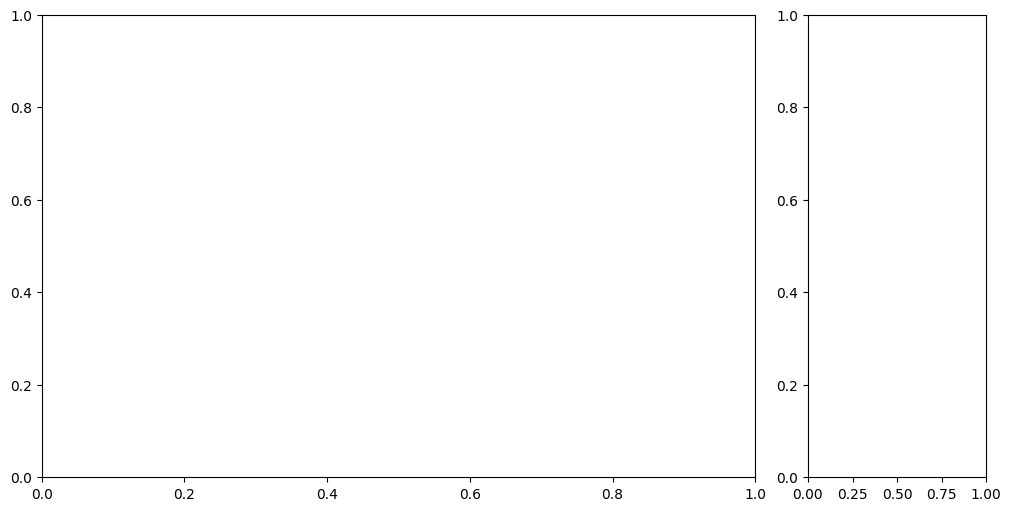

In [20]:
smoker_palette={'yes':'dodgerblue', "no":'salmon'}
## Visualizing Sample means
fig, (ax,ax_bar) = plt.subplots(figsize= (10,5), ncols=2, 
                                constrained_layout=True,
                                gridspec_kw={'width_ratios':[0.8,0.2]})


# Histogram
ax = sns.histplot(data=sample, x='charges',fill=True,hue='smoker',kde=True,
                  stat='density',common_norm=False, ax=ax,
                  palette=smoker_palette)

ax.axvline(np.mean(male_height), ls='--',lw=3, 
           label=f"Smoker (Mean={np.mean(male_height):.2f})",color=smoker_palette['yes'])

ax.axvline(np.mean(female_height), ls='--', lw=3, 
           label=f"Non-Smoker (Mean={np.mean(female_height):.2f})",color=smoker_palette['no'])

ax.legend(prop={"size":14}, loc='upper right')#bbox_to_anchor=[1,1])
## Barplot
sns.barplot(data=sample, x='smoker',y='charges',ax = ax_bar,palette=smoker_palette)
fig.suptitle('Comparison of Charges by Smoker',fontsize='xx-large');